Create a set of routines which can find the roots of arbitrary functions.

1. Relaxation method
2. Newton's method
3. Secant method
4. Bolzano's method
5. False Position method

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict 

In [5]:
def relaxation(f, g, exact_root, first_point, iterations=100, stop_condition=-1):
    xr = np.zeros(iterations + 1)
    xr[0] = first_point
    error = np.full(iterations, np.inf)
    
    i = 0
    while (i < iterations) and (min(error) > stop_condition):
        xr[i+1] = g(xr[i])
        error[i] = abs(xr[i] - exact_root)
        
        points = xr[1:]
        
        i += 1
    
    return points[:i-1], error[:i-1], exact_root

def newton(f, exact_root, first_point, second_point, iterations=100, stop_condition=-1):  
    xr = np.zeros(iterations + 2)
    derivative = np.zeros(iterations + 1)
    error = np.full(iterations, np.inf)
    
    xr[0], xr[1] = first_point, second_point
    first_derivative = (f(xr[1]) - f(xr[0])) / (xr[1] - xr[0])
    derivative[0] = first_derivative
    
    i = 0
    while (i < iterations) and (min(error) > stop_condition):
        xr[i+2] = xr[i+1] - f(xr[i+1])/derivative[i]
        derivative[i+1] = (f(xr[i+1]) - f(xr[i])) / (xr[i+1] - xr[i])
        
        if np.isnan(xr[i+2]) == True:
            break
        
        error[i] = abs(xr[i] - exact_root)
            
        points = xr[2:]
        
        i += 1
        
    return points[:i], error[:i], exact_root

def secant(f, exact_root, first_point, second_point, iterations=100, stop_condition=-1):
    xr = np.zeros(iterations+2)
    xr[0], xr[1] = first_point, second_point
    error = np.full(iterations, np.inf)
    
    i = 0
    while (i < iterations) and (min(error) > stop_condition):
        xr[i+2] = xr[i+1] - f(xr[i+1])*(xr[i+1]-xr[i])/(f(xr[i+1])-f(xr[i]))

        error[i] = abs(xr[i+2] - exact_root)

        points = xr[2:]
        
        i += 1
        
    return points[:i], error[:i], exact_root

def bolzano(f, exact_root, first_point, second_point, iterations=100, stop_condition=-1):
    middle_point = (first_point + second_point)/2
    a = first_point
    b = second_point  
    c = np.zeros(iterations + 1)
    c[0] = middle_point

    sigma = (b-a)/2
    error = np.full(iterations, np.inf)
    
    i = 0
    while (i < iterations) and (min(error) > stop_condition):

        if f(a)*f(c[i]) < 0:
            sigma = (b-a)/2
            c[i+1] = (a + c[i])/2
            a = c[i] - sigma
            b = c[i]

        elif f(c[i])*f(b) < 0:
            sigma = (b-a)/2
            c[i+1] = (c[i] + b)/2
            b = c[i] + sigma
            a = c[i]

        else:
            print('Bolzano conditions not met at iteration ' + repr(i))
            return points[:i], error[:i], exact_root

        error[i] = abs(c[i+1] - exact_root)
        
        points = c[1:]
        
        i += 1
        
    return points[:i-1], error[:i-1], exact_root

def false_position(f, exact_root, first_point, second_point, iterations=100, stop_condition=-1):
    a = first_point
    b = second_point
    middle_point = (a*f(b)-b*f(a))/(f(b)-f(a))
    c = np.zeros(iterations + 1)
    c[0] = middle_point
    error = np.full(iterations, np.inf)
    
    i = 0
    while (i < iterations) and (min(error) > stop_condition):

        if f(a)*f(c[i]) < 0:
            c[i+1] = (a*f(c[i])-c[i]*f(a))/(f(c[i])-f(a))
            b = c[i]

        elif f(c[i])*f(b) < 0:
            c[i+1] = (c[i]*f(b)-b*f(c[i]))/(f(b)-f(c[i]))
            a = c[i]

        else:
            Print('False position conditions not met at iteration ' + repr(i))
            return points, error, exact_root

        error[i] = abs(c[i+1] - exact_root)

        points = c[1:]
        
        i += 1
    
    return points[:i-1], error[:i-1], exact_root

def plot(title, points, f, exact_root):
    x = np.linspace(exact_root-1, exact_root + 1, 100)
    plt.title(title)
    plt.plot([exact_root], [f(exact_root)], color='k', marker='+', markersize=20, label='Root')
    plt.plot(x, f(x), label='$f(x)$')
    plt.plot(points, f(points), marker='o', linestyle='dashed', label='Iterations')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend(loc='best')
    
    plt.grid(linestyle='dashed')
    
    return None

def error_plot(title, error):
    iterations = len(error)
    
    x = np.linspace(1,iterations,iterations)
    
    plt.title('Error plot of '+title)
    plt.plot(x, error, label='Error')
    plt.yscale('log')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.legend(loc='best')
    plt.grid(linestyle='dashed')
    
    return None

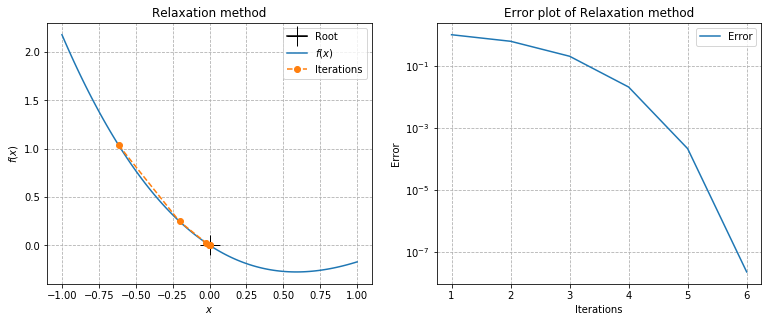

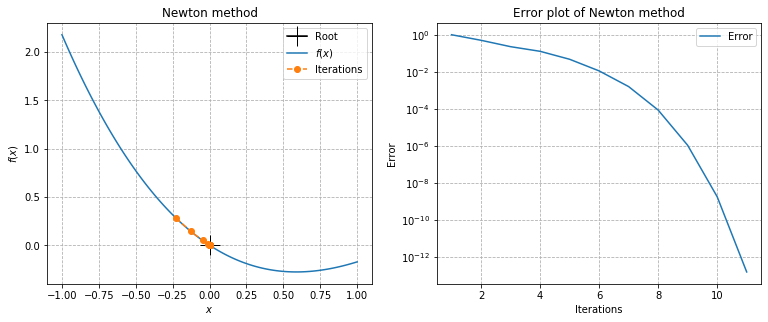

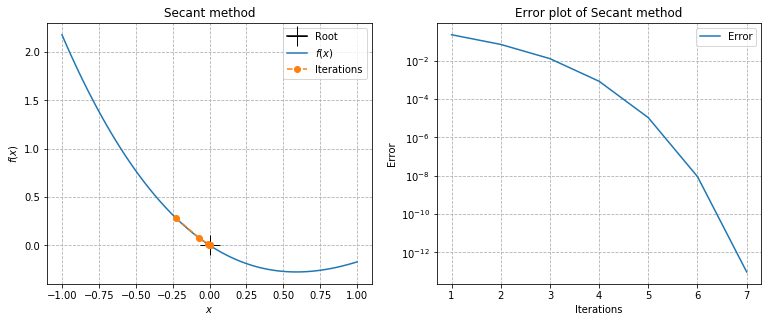

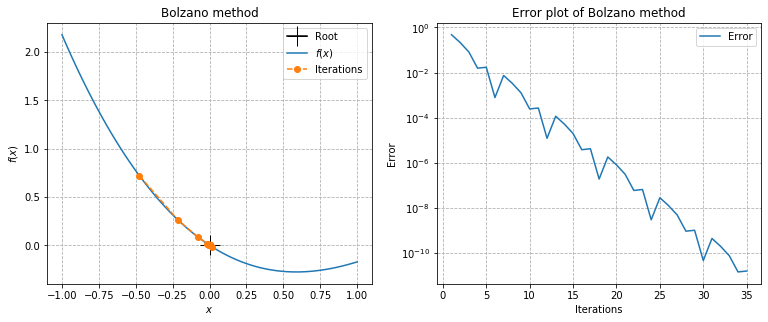

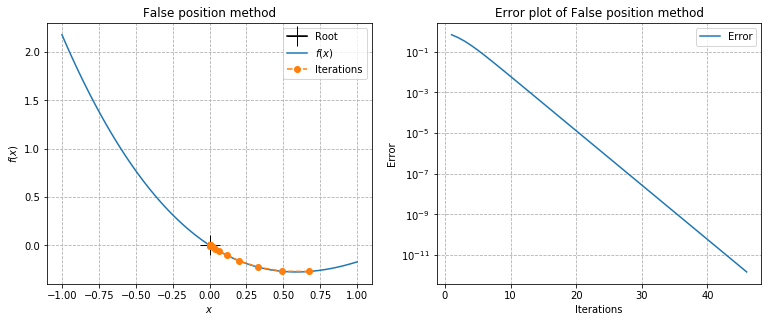

In [6]:
f = lambda x: np.exp(-x) - np.cos(x)
g = lambda x: np.log(abs(np.cos(x)))

root = 0

args_relaxation = [f, g, root, 1, 7]
args_newton = [f, root, -1, -0.5, 12]
args_secant = [f, root, -1, -0.5, 8]
args_bolzano = [f, root, -1, 1.1, 50]
args_false_position = [f, root, -1, 1, 50]


title_func_args = OrderedDict([
    ('Relaxation method' , {relaxation : args_relaxation}),
    ('Newton method' , {newton : args_newton}),
    ('Secant method' , {secant : args_secant}),
    ('Bolzano method' , {bolzano : args_bolzano}),
    ('False position method' , {false_position : args_false_position})
])

i = 0
for title, func_args in title_func_args.items():
    for func, args in func_args.items():
        points, error, exact_root = func(*args, 1e-12)
    plt.figure(figsize=(12.8, 4.8))
    
    plt.subplot(1,2,1)
    plot(title, points, f, exact_root)
    
    plt.subplot(1,2,2)
    error_plot(title, error)
    plt.show()
    i += 1